In [1]:
%%script bash
cd .. && mkdir build
cd build/ && rm -rf *
cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
make install

-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found PythonInterp: /home/fede/anaconda3/envs/MN/bin/python (found version "3.7.9") 
-- Found PythonLibs: /home/fede/anaconda3/envs/MN/lib/libpython3.7m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
-- Configuring done
-- Generating done
-- Build files have been written to: /home/fede/Documents/Facultad/MN/metodos-numericos-grupo-4/tp2/build
Scanning dependencies of target tp2
[ 10%] Building CXX object CMakeFiles/tp2.dir/src/main.cp

mkdir: cannot create directory ‘build’: File exists
Release mode
CMAKE_INSTALL_PREFIX=/home/fede/Documents/Facultad/MN/metodos-numericos-grupo-4/tp2


In [2]:
!pwd
!python --version
import metnum

/home/fede/Documents/Facultad/MN/metodos-numericos-grupo-4/tp2/notebooks
Python 3.7.9


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

df_train = pd.read_csv("../data/train.csv")

In [4]:
# Uso values para mandar todo a arrays de numpy
# ACA SE DEBE REDUCIR EL DATASET EN CASO DE QUERER EXPERIMENTAR CON MENOS MUESTRAS.
#df_train = df_train[:5000]
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

In [5]:
%%time
# PRUEBAS ACCURACY PARA ALGUNA PROPORCION TRAIN/TEST   (70/30,___80/20___,90/10)
accuracies1 = np.zeros(19)
limit = int(0.8 * X.shape[0])
X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]
assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)


for i in tqdm(range (1,20)):
    clf = metnum.KNNClassifier(i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies1[i-1] = acc
#print("Accuracy: {}".format(accuracies))

100%|██████████| 19/19 [59:10<00:00, 186.87s/it] 

CPU times: user 59min 23s, sys: 17.6 s, total: 59min 40s
Wall time: 59min 10s


In [6]:
# GRAFICOS DE KNN OPTIMO
import matplotlib.pyplot as plt
x_scale = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.plot(x_scale, accuracies1[:19])
plt.plot(x_scale, accuracies2[:19])
plt.plot(x_scale, accuracies3[:19])
plt.legend(["70/30","80/20","90/10"])
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("")

NameError: name 'accuracies1' is not defined

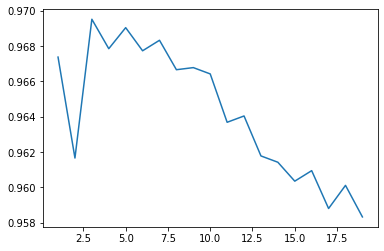

In [10]:
plt.plot(x_scale,accuracies5[:19])

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.colors import LogNorm

In [37]:
confusion_matrix(y_val,y_pred)

array([[848,   1,   0,   0,   0,   1,   2,   0,   0,   0],
       [  0, 947,   1,   1,   1,   0,   0,   0,   0,   0],
       [  8,   7, 769,   3,   0,   2,   0,   9,   2,   1],
       [  0,   3,   6, 857,   0,   6,   0,   3,   4,   3],
       [  0,   8,   0,   0, 781,   0,   5,   0,   0,  17],
       [  3,   0,   0,  16,   0, 715,   7,   0,   2,   4],
       [  5,   2,   0,   0,   0,   1, 823,   0,   0,   0],
       [  0,   9,   3,   0,   1,   0,   0, 864,   0,   7],
       [  3,  19,   5,  12,   5,  10,   1,   2, 738,   7],
       [  6,   2,   2,   8,   7,   2,   0,  11,   0, 802]])

Text(33.0, 0.5, 'Prediction')

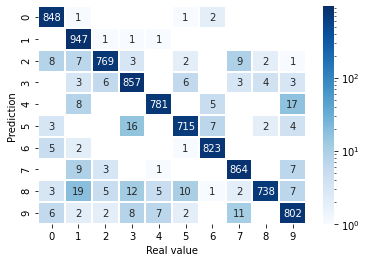

In [50]:
sns.heatmap(confusion_matrix(y_val,y_pred), cmap = "Blues", norm = LogNorm(), annot= True, fmt = 'd', linewidths = '1')
plt.xlabel('Real value')
plt.ylabel('Prediction')

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
# GRAFICANDO CON K-FOLD

In [154]:
d = {'Accuracy': [0.97, 0.9672619047619048, 0.9627380952380953, 0.9638095238095238, 0.9695238095238096, 0.9744047619047619, 0.9773809523809524, 0.968452380952381, 0.971547619047619, 0.974047619047619,0.9666666666666668,0.9731666666666665],
     'Test fold number': [1,2,3,4,5,1,2,3,4,5,0,0], 'Type': ['knn','knn','knn','knn','knn','pca','pca','pca','pca','pca','knn','pca'],
    'Size': ['single fold','single fold','single fold','single fold','single fold','single fold','single fold','single fold','single fold','single fold','average','average'],}

df = pd.DataFrame(data=d)
df

,Accuracy,Test fold number,Type,Size
0,0.970000,1,knn,single fold
1,0.967262,2,knn,single fold
2,0.962738,3,knn,single fold
3,0.963810,4,knn,single fold
4,0.969524,5,knn,single fold
5,0.974405,1,pca,single fold
6,0.977381,2,pca,single fold
7,0.968452,3,pca,single fold
8,0.971548,4,pca,single fold
9,0.974048,5,pca,single fold


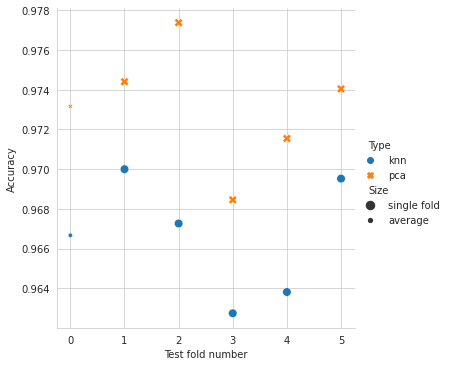

In [157]:
sns.set_style("whitegrid", {'grid.linestyle': '-'})
sns.relplot(
    data=df, x="Test fold number", y="Accuracy",
    kind="scatter", style = 'Type', hue = 'Type', legend = 'auto', size = 'Size'
)

In [124]:
df['Accuracy'][4] / df['Accuracy'][2]

1.0070483492024236